# Ćwiczenia  6

***TEMAT:*** funkcje wielu zmiennych - definicja, wykres, granica, ciągłość, pochdone cząstkowe i gradient

## Funkcje wielu zmiennych: definicja i  wykresy niektórych funkcji

Funkcją $n$-zmiennych ($n \geq 2$) określoną na zbiorze $A\subset\mathbb{R}^n$ o wartościach w $\mathbb{R}$ nazywamy przyporządkowanie każdemu punktowi ze zbioru $A$ dokładnie jednej liczby rzeczywistej. Funkcję taką oznaczamy przez $f:A\rightarrow \mathbb{R}$. Wartość funkcji $f$ w punkcie $(x_1, ... x_n)$ oznaczamy przez $f(x_1, ... x_n)$.

#### Zadanie 1  

Wyznacz dziedzinę następujących funkcji i naszkicuj ją na płaszczyźnie:
>1. $f(x,y)=\sqrt{4-(x-4)^2-(y+2)^2}$;
>2. $f(x,y)=\ln x\cdot \ln y +\frac{1}{\sqrt{1-x-y}}$.

##### Rozwiązanie:

1. Dziedzinę funkcji $f$ tworzy zbiór tych $(x,y)$ takich, że 

$$
4-(x-4)^2-(y+2)^2\geq 0
$$

czyli zbiór rozwiązań nierówności

$$
(x-4)^2+(y+2)^2\leq 4.
$$

Jest to kolo o środku w punkcie $(4,-2)$ i promieniu $2$.

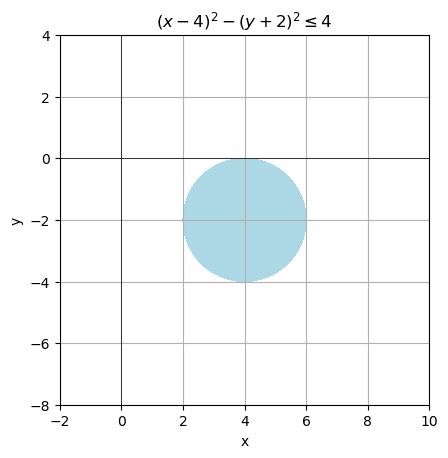

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid of x and y values
x = np.linspace(-2, 10, 400)
y = np.linspace(-8, 4, 400)
X, Y = np.meshgrid(x, y)

# Define the function for the inequality (x-4)^2 + (y+2)^2 <= 4
Z = (X - 4)**2 + (Y + 2)**2 - 4

# Plot the contour for the region where Z <= 0
plt.contourf(X, Y, Z, levels=[-1000, 0], colors=['lightblue'])

# Additional plot settings
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$(x-4)^2 - (y+2)^2 \leq 4$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


2. Dziedzinę funkcji $f$ tworzy zbiór tych $(x,y)$ dla których

$$
x>0, y>0 \text{ oraz } 1-x-y>0.
$$

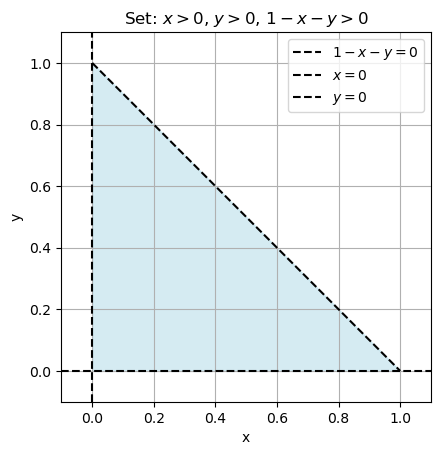

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x range for the plot
x = np.linspace(0, 1, 400)

# Define the boundary lines
y1 = 0 * x          # y = 0 line for y > 0
y2 = 1 - x          # y = 1 - x line for 1 - x - y > 0

# Fill the region where the inequalities hold
plt.fill_between(x, y1, y2, where=(y2 > y1), color="lightblue", alpha=0.5)

# Plot the boundaries with dashed lines
plt.plot(x, y2, 'k--', label=r'$1 - x - y = 0$')
plt.axvline(0, color='k', linestyle='--', label=r'$x = 0$')
plt.axhline(0, color='k', linestyle='--', label=r'$y = 0$')

# Additional plot settings
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Set: $x > 0$, $y > 0$, $1 - x - y > 0$')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


#### Zadanie 2 
Wykreśl wykres poniższych funkcji:
 >1. $f(x,y)=x^2+y^2$;
 >2. $f(x,y)=\sqrt{x^2+y^2}$;
 >3. $f(x,y)=\sqrt{16-x^2-y^2}$ i $g(x,y)=-\sqrt{16-x^2-y^2} $;
 >4. $f(x,y)=x^2-y^2$.

##### Rozwiązanie:

In [12]:
import IPython.display as display


In [1]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/calculator/ahx8sscp', width=800, height=600, style="border: 1px solid black")

In [2]:
from IPython.display import IFrame
IFrame('https://geogebra.org/calculator/x4ngbw4r', width=800, height=600, style="border: 1px solid black")

In [3]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/calculator/dywfgwgb', width=800, height=600, style="border: 1px solid black")

In [4]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/calculator/rztxuac3', width=800, height=600, style="border: 1px solid black")

## Granica i ciągłość

### Granica
Niech $A\subset \mathbb{R}^n$ i niech $x_0\in A$ będzie punktem skupienia zbioru $A$ (to oznacza, że $x_0$ jest granicą ciągu  $(x_n)$  punktów ze zbioru $A\setminus\{x_0\}$). Mówimy, że funkcja $f:A\to\mathbb{R}$ ma granicę w punkcie $x_0$ równą $g$ i piszemy

$$
\lim_{x\to x_0 } f(x)=g,
$$

gdy dla każdego ciągu $(x_n)$ punktów zbioru $A\setminus\{x_0\}$ zachodzi

$$
x_n \xrightarrow{n \to \infty} x_0\Rightarrow f(x_n) \xrightarrow{n \to \infty} g.
$$

#### Zadanie 3 

Oblicz następujące granice
>1. $\displaystyle \lim_{(x,y)\to (1,1)}\frac{x^2y}{x^2+y^2}$;
>2. $\displaystyle \lim_{(x,y)\to (0,0)}\frac{x^2y}{x^2+y^2}$;
>3. $\displaystyle \lim_{(x,y)\to (0,0)}\frac{x^2+y^2}{\sqrt{x^2+y^2}}$;
>4. $\displaystyle \lim_{(x,y)\to (0,0)}\frac{x^2y^3}{x^4+y^4}$.

##### Rozwiązanie:
1. Z własności granic bardzo łatwo dostajemy, że 

$$
\displaystyle \lim_{(x,y)\to (1,1)}\frac{x^2y}{x^2+y^2}=\frac{1}{2}.
$$

2. Dla $(x,y)\not=0$ mamy 

$$
\left|\frac{x^2y}{x^2+y^2}\right|\leq |y|\cdot \frac{x^2}{x^2+y^2}\leq |y|.
$$

Zatem 

$$
\lim_{(x,y)\to (0,0)}\frac{x^2y}{x^2+y^2}=0.
$$
3. Dla $(x,y)\not=(0,0)$ mamy

$$
\left|\frac{x^2+y^2}{\sqrt{x^2+y^2}}\right|\leq |x|\cdot\frac{|x|}{\sqrt{x^2+y^2}}+|y|\cdot\frac{|y|}{\sqrt{x^2+y^2}}\leq |x|+|y|.
$$

Zatem

$$
\lim_{(x,y)\to (0,0)}\frac{x^2+y^2}{\sqrt{x^2+y^2}}=0.
$$
4. Niech dla $(x,y)\not=(0,0)$ 

$$
f(x,y)=\frac{x^2y^3}{x^4+y^4},
$$

niech

$$
(0,0)\not=(x_n,y_n)\xrightarrow{n\to\infty}(0,0)
$$

i niech 

$$
u_n=\max\{|x_n|,|y_n|\}.
$$

Jest jasne, że 

$$
u_n\xrightarrow{n\to\infty}0.
$$

Ponadto 

$$
|f(x_n,y_n)|=\left|\frac{x_n^2y_n^3}{x_n^4+y_n^4}\right|\leq\frac{u_n^5}{u_n^4}=u_n.
$$

Zatem 


$$
f(x_n,y_n)\xrightarrow{n\to\infty}0.
$$

Ostatecznie 

$$
\lim_{(x,y)\to (0,0)}\frac{x^2y^3}{x^4+y^4}=0.
$$

#### Zadanie 4
Pokaż, że nastepujace funkcje nie mają granicy w punkcie (0,0).

>1. $f(x,y)=1$ jeśli $x=0$ lub $y=0$ oraz $f(x,y)=0$ w przeciwnym wypadku.
>2. $\displaystyle f(x,y)=\frac{xy}{x^2+y^2}$ dla $(x,y)\not=0$.

##### Rozwiązanie:

1. Ciągi  $(0,1/n)_{n\in\mathbb{N}}$ oraz $(1/n,1/n)_{n\in\mathbb{N}}$ dążą do punktu $(0,0)$.   
Ponadto 


$$
f(0,1/n)=1\xrightarrow{n\to\infty}1 \quad\text{ i }\quad f(1/n,1/n)=0\xrightarrow{n\to\infty}0. 
$$
Zatem funkcja $f$ nie ma granicy w punkcie $(0,0)$.

2. Ciągi  $(0,1/n)_{n\in\mathbb{N}}$ oraz $(1/n,1/n)_{n\in\mathbb{N}}$ dążą do punktu $(0,0)$.   
Ponadto 


$$
f(0,1/n)=0\xrightarrow{n\to\infty}0\quad \text{ i }\quad f(1/n,1/n)=1/2\xrightarrow{n\to\infty}1/2. 
$$
Zatem funkcja $f$ nie ma granicy w punkcie $(0,0)$.

### Ciągłość

Niech $A\subset \mathbb{R}^n$ i niech $f:A\to\mathbb{R}$. Mówimy, że funkcja $f$ jest ciągła w punkcie $x_0\in A$, gdy 
 dla każdego ciągu $(x_n)$ punktów zbioru $A$ zachodzi

$$
x_n \xrightarrow{n \to \infty} x_0\Rightarrow f(x_n) \xrightarrow{n \to \infty} f(x_0).
$$


***Uwaga:***
>* Jeśli $x_0$ **nie** jest punktem skupienia zbioru $A$, to funkcja $f$ **jest** ciągła w punkcie $x_0$.
>* Jeśli $x_0$  jest punktem skupienia zbioru $A$, to funkcja $f$ **jest** ciągła w punkcie $x_0$ dokładnie wtedy gdy 
$\displaystyle \lim_{x\to x_0}f(x)=f(x_0)$.
>* Jeśli funkcja $f$ jest ciągła w każdym punkcie zbioru $A$, to mówimy że jest ciągła na $A$.




#### Zadanie 5

Omów ciągłość poniższych funkcji.

>1. $f(x,y,z)=x^2y+z$.
>2. $f(x,y)=\frac{x^4}{x^2+y^2}$, gdy $(x,y)\not=(0,0)$ oraz $f(0,0)=1$.

##### Rozwiązanie:
1. Jest jasne, że funkcja $f$ jest funkcją ciągłą na $\mathbb{R}^3$. Istotnie, niech 

$$
(x_n,y_n,z_n)\xrightarrow{n\to\infty}(x_0,y_0,z_0).
$$

Wtedy 

$$
x_n\xrightarrow{n\to\infty}x_0,\quad y_n\xrightarrow{n\to\infty}y_0,\quad z_n\xrightarrow{n\to\infty}z_0.
$$

Zatem 

$$
f(x_n,y_n,z_n)=x_n^2y_n+z_n\xrightarrow{n\to\infty}x^2_0y_0+z_0=f(x_0,y_0,z_0).
$$

2. Argumenty takie jak wyżej i wiedza z wykłady łatwo dają, że funkcja $f$ jest ciągła na zbiorze $\mathbb{R}^2\setminus\{(0,0)\}$.
Mamy

$$
f(0,1/n)=0.
$$

Zatem $f$ nie jest ciągła w punkcie $(0,0)$.

## Pochodne cząstkowe

### Definicja i podstawowe rachunki

Pochodną cząstkową I rzędu funkcji $f$ w punkcie $(x_1, ... , x_n)$ względem zmiennej $x_k$ nazywamy granicę ilorazu różnicowego:

$$ 
{\frac{\partial f}{\partial x_k}(x_1, ..., x_n):=\lim\limits_{h \to 0 } \frac{f(x_1, ... , x_{k-1} , x_k+h, x_{k+1}, ... x_n) - f(x_1, ..., x_n)}{h}.}
$$


#### Zadanie 5 

Oblicz wszystkie pochodne cząstkowe I rzędu dla funkcji 

$$
f(x,y,z)=xy^2+z.
$$

##### Rozwiązanie:
1.

$$
\frac{\partial f}{\partial x}(x,y,z)= \lim_{h\to 0} \frac{f((x+h,y,z))-f(x,y,z)}{h}=
\lim_{h\to 0}\frac{hy^2}{h}=y^2.
$$

2.

$$
\frac{\partial f}{\partial y}(x,y,z)= \lim_{h\to 0} \frac{f((x,y+y,z))-f(x,y,z)}{h}=
\lim_{h\to 0}\frac{x(y+h)^2-xy^2}{h}=
=\lim_{h\to 0}\frac{2xyh+xh^2}{h}=\lim_{h\to 0}(2xy+xh)=2xy.
$$

3.

$$
\frac{\partial f}{\partial z}(x,y,z)= \lim_{h\to 0} \frac{f((x,y,z+h))-f(x,y,z)}{h}=
\lim_{h\to 0}\frac{h}{h}=1.
$$


#### Zadanie 6

Obliczymy pochodne cząstkowe funkcji 

$$
f(x,y)=\begin{cases}
\frac{xy}{x^2+y^2}, & (x,y)\not=(0,0)\\
0, & (x,y)=(0,0).
\end{cases}
$$

w punkcie $(0,0)$.

##### Rozwiązanie:

Mamy

$$
\frac{\partial f}{\partial x}(0,0)=\lim_{h\to 0}\frac{f(h,0)-f(0,0)}{h}
=\lim_{h\to 0}\frac{0-0}{h}=0
$$

oraz

$$
\frac{\partial f}{\partial y}(0,0)=\lim_{h\to 0}\frac{f(0,h)-f(0,0)}{h}
=\lim_{h\to 0}\frac{0-0}{h}=0.
$$

***Uwaga:*** zauważmy, że 

$$
f(1/n,1/n)=1/2\xrightarrow{n\to\infty}1/2\not=0=f(0,0).
$$

Stąd $f$ nie jest ciągła w punkcie $(0,0)$. Zatem istnienie pochodnych cząstkowych w punkcie $(0,0)$ __nie implikuje__ ciągłości funkcji w tym punkcie

#### Zadanie 7

Zbadaj istnienie pochodnych cząstkowych funkcji $f(x,y)=\sqrt{x^2+y^4}$ w punkcie $(0,0)$.

##### Rozwiązanie:

1. Mamy

$$
\frac{\partial f}{\partial x}(0,0)=\lim_{h\to 0}\frac{f(h,0)-f(0,0)}{h}
=\lim_{h\to 0}\frac{|h|}{h}.
$$

Ta granica nie istnieje, zatem funkcja $f$ nie ma pochodnej cząstkowej względem pierwszej zmiennej w punkcie $(0,0)$.

2.  Na podstawie definicji otrzymujemy, że 
$$
\frac{\partial f}{\partial y}(0,0)=\lim_{h\to 0}\frac{f(0,h)-f(0,0)}{h}
=\lim_{h\to 0}\frac{h^2}{h}=0.
$$


#### Zadanie 8 

Korzystając z reguł różniczkowania oblicz pochodne cząstkowe poniższych funkcji.

> 1. $f(x,y,z)=x^2+2xyz+yz^3$;
> 2. $f(x,y)=xe^{x^2+y^2}$;
> 3. $f(x,y)=\frac{x^2+y}{x^2+y^2+1}$.

Dla $f(x,y,z) = x^2 + 2xyz + yz^3$:

$$
 \frac{\partial f}{\partial x}{(x, y, z)} = 2x + 2yz
$$
$$
\frac{\partial f}{\partial y}{(x, y, z)} = 2xz + z^3
$$
$$
\frac{\partial f}{\partial z} {(x, y, z)} = 2xy + 3yz^2
$$

Dla $f(x,y) = x e^{x^2 + y^2}$:
$$
\frac{\partial f}{\partial x}{(x, y)} = e^{x^2 + y^2} + 2x^2 e^{x^2 + y^2}
$$
$$
\frac{\partial f}{\partial y}{(x, y)} = 2x y e^{x^2 + y^2}
$$

Dla $ f(x,y) = \frac{x^2 + y}{x^2 + y^2 + 1} $:
$$
\frac{\partial f}{\partial x} {(x, y)} = \frac{2x(x^2 + y^2 + 1) - (x^2 + y)(2x)}{(x^2 + y^2 + 1)^2} = \frac{2x(x^2 + y^2 + 1 - y)}{(x^2 + y^2 + 1)^2}
$$
$$
\frac{\partial f}{\partial y} {(x, y)} = \frac{(x^2 + y^2 + 1) - (x^2 + y)(2y)}{(x^2 + y^2 + 1)^2} = \frac{x^2 + y^2 + 1 - 2y(x^2 + y)}{(x^2 + y^2 + 1)^2}
$$